<a href="https://colab.research.google.com/github/BrianBehnke/DS-Sprint-02-Storytelling-With-Data/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
-https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv

-https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv

-https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv

-https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv

-https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv



### Stretch goals
- [ipywidgets](https://github.com/jupyter-widgets/ipywidgets)
- [Matplotlib animation](https://matplotlib.org/examples/animation/index.html)
- [Connected scatter plots](http://www.thefunctionalart.com/2012/09/in-praise-of-connected-scatter-plots.html)
- [Idyll markup language](https://idyll-lang.org/) for "scrollytelling"

Merge data cheatsheet: https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
!pip install --upgrade seaborn

In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

In [3]:
income=pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
lifespan=pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
entities=pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
concepts=pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')
population=pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((44268, 3), (44370, 3), (51939, 3), (273, 33), (590, 16))

In [5]:
print(income.head())
print(lifespan.head())
print(population.head())
print(entities.head())
print(concepts.head())

   geo  time  income_per_person_gdppercapita_ppp_inflation_adjusted
0  abw  1800                                                833    
1  abw  1801                                                833    
2  abw  1802                                                833    
3  abw  1803                                                833    
4  abw  1804                                                833    
   geo  time  life_expectancy_years
0  abw  1800                  34.42
1  abw  1801                  34.42
2  abw  1802                  34.42
3  abw  1803                  34.42
4  abw  1804                  34.42
   geo  time  population_total
0  abw  1800             19286
1  abw  1801             19286
2  abw  1802             19286
3  abw  1803             19286
4  abw  1804             19286
  country alt_5                    alternative_1 alternative_2 alternative_3  \
0    abkh   NaN                              NaN           NaN           NaN   
1     abw   NaN               

In [6]:
df = pd.merge(income, lifespan)
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,abw,1800,833,34.42
1,abw,1801,833,34.42
2,abw,1802,833,34.42
3,abw,1803,833,34.42
4,abw,1804,833,34.42


In [0]:
entities[entities.country=='abw'].T

In [8]:
variables = ['country', 'name', 'world_6region']
entities[variables].head()

,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america
2,afg,Afghanistan,south_asia
3,ago,Angola,sub_saharan_africa
4,aia,Anguilla,america


In [9]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,abw,1800,833,34.42
1,abw,1801,833,34.42
2,abw,1802,833,34.42
3,abw,1803,833,34.42
4,abw,1804,833,34.42


In [0]:
df = pd.merge(df, population)

In [11]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,abw,1800,833,34.42,19286
1,abw,1801,833,34.42,19286
2,abw,1802,833,34.42,19286
3,abw,1803,833,34.42,19286
4,abw,1804,833,34.42,19286


In [12]:
df = pd.merge(df, entities[variables], 
              how='inner', left_on='geo', right_on='country')

df.drop(columns=['geo', 'country'], inplace=True)

df.rename(columns={
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan', 
    'population_total': 'population', 
    'name': 'country', 
    'world_6region': 'region'
}, inplace=True)

df.shape

(41790, 6)

In [13]:
df.head()

,year,income,lifespan,population,country,region
0,1800,833,34.42,19286,Aruba,america
1,1801,833,34.42,19286,Aruba,america
2,1802,833,34.42,19286,Aruba,america
3,1803,833,34.42,19286,Aruba,america
4,1804,833,34.42,19286,Aruba,america


In [14]:
df.describe(exclude=[np.number])

,country,region
count,41790,41790
unique,194,6
top,Switzerland,europe_central_asia
freq,219,10991


In [15]:
df.region.unique()

array(['america', 'south_asia', 'sub_saharan_africa',
       'europe_central_asia', 'middle_east_north_africa',
       'east_asia_pacific'], dtype=object)

In [16]:
europe = df[df.region=='europe_central_asia']
europe[europe.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
675,1818,669,35.40,435384,Albania,europe_central_asia
775,1918,1478,19.49,953764,Albania,europe_central_asia
875,2018,12424,78.01,2934363,Albania,europe_central_asia
1379,1818,515,34.00,419962,Armenia,europe_central_asia
1479,1918,671,26.14,1006536,Armenia,europe_central_asia
1579,2018,8662,75.97,2934152,Armenia,europe_central_asia
2036,1818,1986,34.40,3366878,Austria,europe_central_asia
2136,1918,5103,32.41,6643721,Austria,europe_central_asia
2236,2018,44645,81.84,8751820,Austria,europe_central_asia
2255,1818,778,29.17,894149,Azerbaijan,europe_central_asia


In [17]:
now = df[df.year==2018]
print(now.shape)
now.sample(10)

(188, 6)


,year,income,lifespan,population,country,region
3769,2018,18853,75.32,7036848,Bulgaria,europe_central_asia
1360,2018,18942,76.97,44688864,Argentina,america
29965,2018,2804,61.14,8418346,Papua New Guinea,east_asia_pacific
3331,2018,1710,61.60,19751651,Burkina Faso,sub_saharan_africa
12842,2018,39006,82.62,65233271,France,europe_central_asia
12404,2018,40290,82.06,5542517,Finland,europe_central_asia
40694,2018,2896,64.30,282117,Vanuatu,east_asia_pacific
37192,2018,17856,70.48,5851466,Turkmenistan,europe_central_asia
2017,2018,45783,82.87,24772247,Australia,east_asia_pacific
7101,2018,23366,80.66,18197209,Chile,america


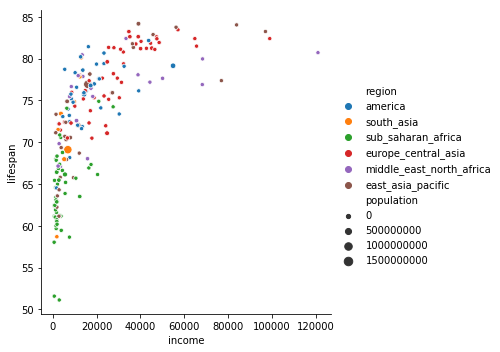

In [18]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now);

In [0]:
years = [1818, 1918, 2018]

centuries = europe[europe.year.isin(years)]

In [0]:
sns.relplot?

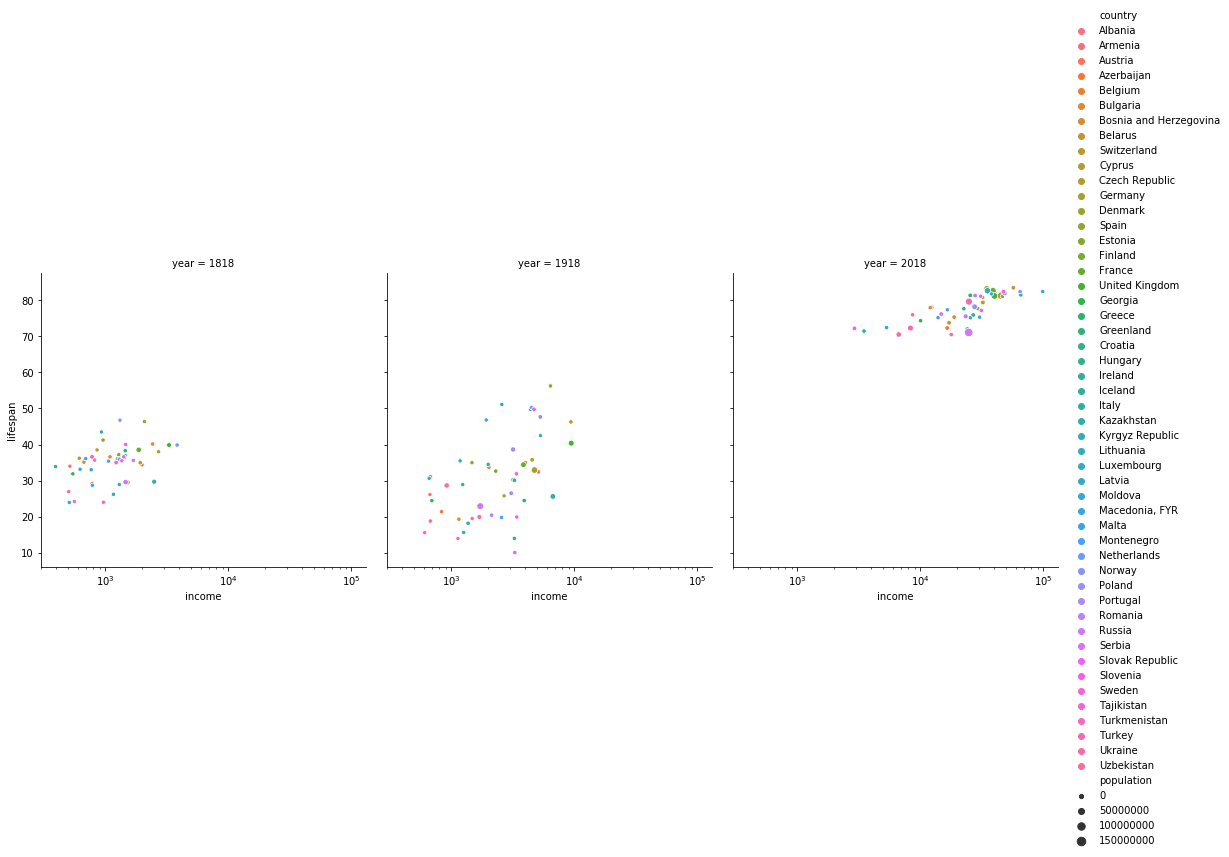

In [33]:
sns.relplot(x='income', y='lifespan', hue='country', size='population', 
            col='year', data=centuries);

plt.xscale('log');

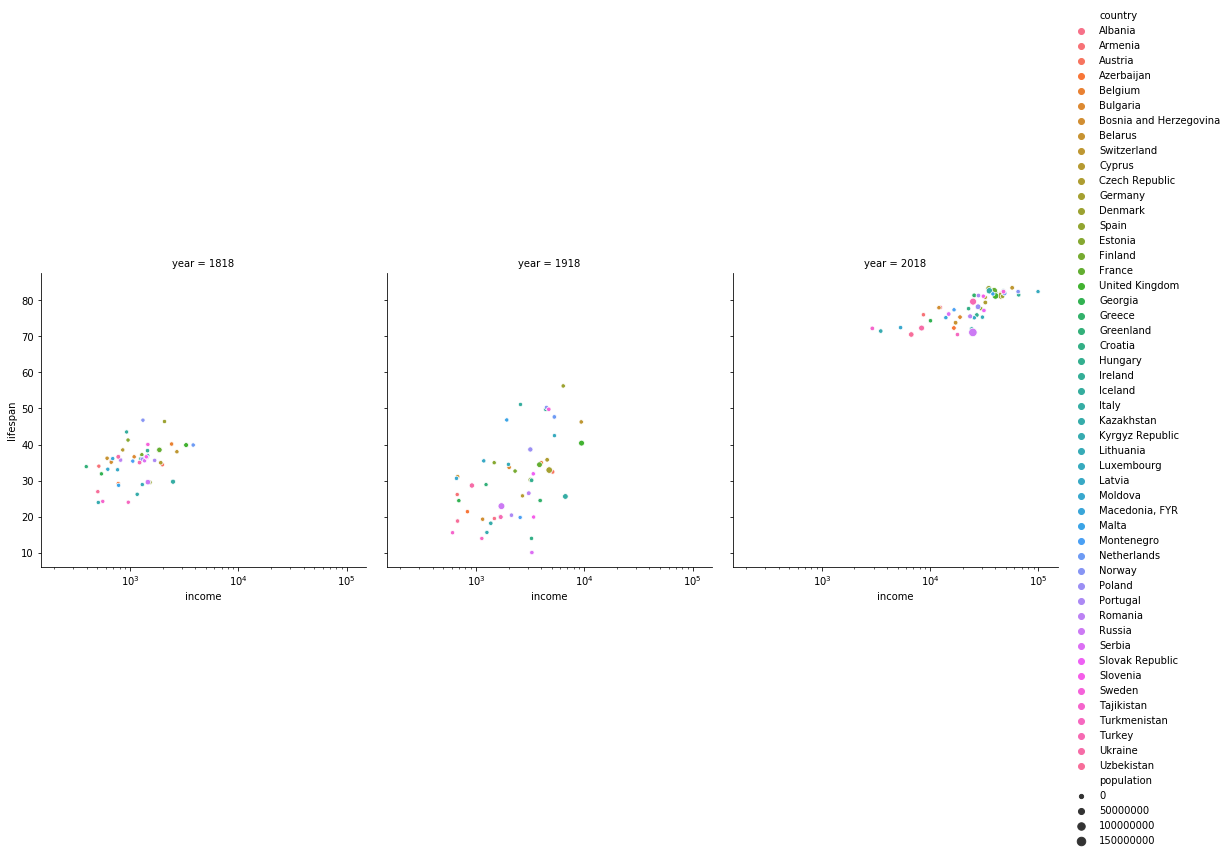

In [34]:
sns.relplot(x='income', y='lifespan', hue='country', size='population', 
            col='year', data=centuries);

plt.xscale('log')
plt.xlim((150, 150000));

years = [1818, 1918, 2018]

centuries = europe[europe.year.isin(years)]

europe = df[df.region=='europe_central_asia']

europe[europe.year.isin([1818, 1918, 2018])]

df.region.unique()

In [43]:
europe.country.unique()

array(['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan',
       'Belgium', 'Bulgaria', 'Bosnia and Herzegovina', 'Belarus',
       'Switzerland', 'Cyprus', 'Czech Republic', 'Germany', 'Denmark',
       'Spain', 'Estonia', 'Finland', 'France', 'United Kingdom',
       'Georgia', 'Greece', 'Greenland', 'Croatia', 'Hungary', 'Ireland',
       'Iceland', 'Italy', 'Kazakhstan', 'Kyrgyz Republic', 'Lithuania',
       'Luxembourg', 'Latvia', 'Moldova', 'Macedonia, FYR', 'Malta',
       'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russia', 'Serbia', 'Slovak Republic', 'Slovenia',
       'Sweden', 'Tajikistan', 'Turkmenistan', 'Turkey', 'Ukraine',
       'Uzbekistan'], dtype=object)

In [0]:
european_war_countries = ['Albania', 'Austria', 'Belgium', 'Bulgaria',
       'Czech Republic', 'Germany', 'Spain' 'Finland', 'France', 
       'United Kingdom', 'Greece', 'Ireland', 'Italy',  'Lithuania',
       'Luxembourg', 'Latvia', 'Malta', 'Montenegro', 'Netherlands', 'Norway', 
       'Poland', 'Portugal', 'Romania', 'Russia', 'Serbia', 'Sweden', 'Turkey']

In [66]:
years = [1818, 1918, 2018]

centuries = europe[europe.year.isin(years)]

war_countries = europe[europe.country.isin(european_war_countries)]
#print(centuries.head(10))
#print(war_countries.head(10))

world_war = centuries[centuries.country.isin(european_war_countries)]

print(world_war.head(10))

      year  income  lifespan  population   country               region
675   1818     669     35.40      435384   Albania  europe_central_asia
775   1918    1478     19.49      953764   Albania  europe_central_asia
875   2018   12424     78.01     2934363   Albania  europe_central_asia
2036  1818    1986     34.40     3366878   Austria  europe_central_asia
2136  1918    5103     32.41     6643721   Austria  europe_central_asia
2236  2018   44645     81.84     8751820   Austria  europe_central_asia
2693  1818    2418     40.14     3430748   Belgium  europe_central_asia
2793  1918    4003     34.94     7673616   Belgium  europe_central_asia
2893  2018   42760     81.23    11498519   Belgium  europe_central_asia
3569  1818    1091     36.59     2166788  Bulgaria  europe_central_asia


In [0]:
sns.relplot?

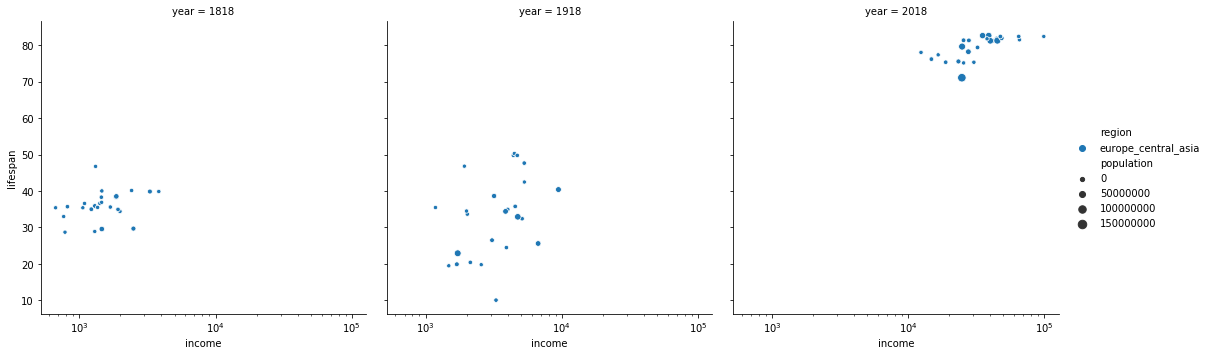

In [67]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            col='year', data=world_war)

plt.xscale('log');


In [171]:
print(world_war.sort_values(by='income', ascending=False))

lux = world_war[world_war.country=='Luxembourg']
lux_income = lux.income.values[0]
lux_lifespan = lux.lifespan.values[0]
print(lux_income)
print(lux_lifespan)



       year  income  lifespan  population         country               region
22910  2018   99034     82.39      590321      Luxembourg  europe_central_asia
17654  2018   65622     81.49     4803748         Ireland  europe_central_asia
28213  2018   64846     82.39     5353363          Norway  europe_central_asia
27994  2018   48542     81.92    17084459     Netherlands  europe_central_asia
35440  2018   47520     82.37     9982709          Sweden  europe_central_asia
9948   2018   45166     81.25    82293457         Germany  europe_central_asia
2236   2018   44645     81.84     8751820         Austria  europe_central_asia
2893   2018   42760     81.23    11498519         Belgium  europe_central_asia
13499  2018   40079     81.19    66573504  United Kingdom  europe_central_asia
12842  2018   39006     82.62    65233271          France  europe_central_asia
25147  2018   37938     81.75      432089           Malta  europe_central_asia
18749  2018   35192     82.62    59290969           

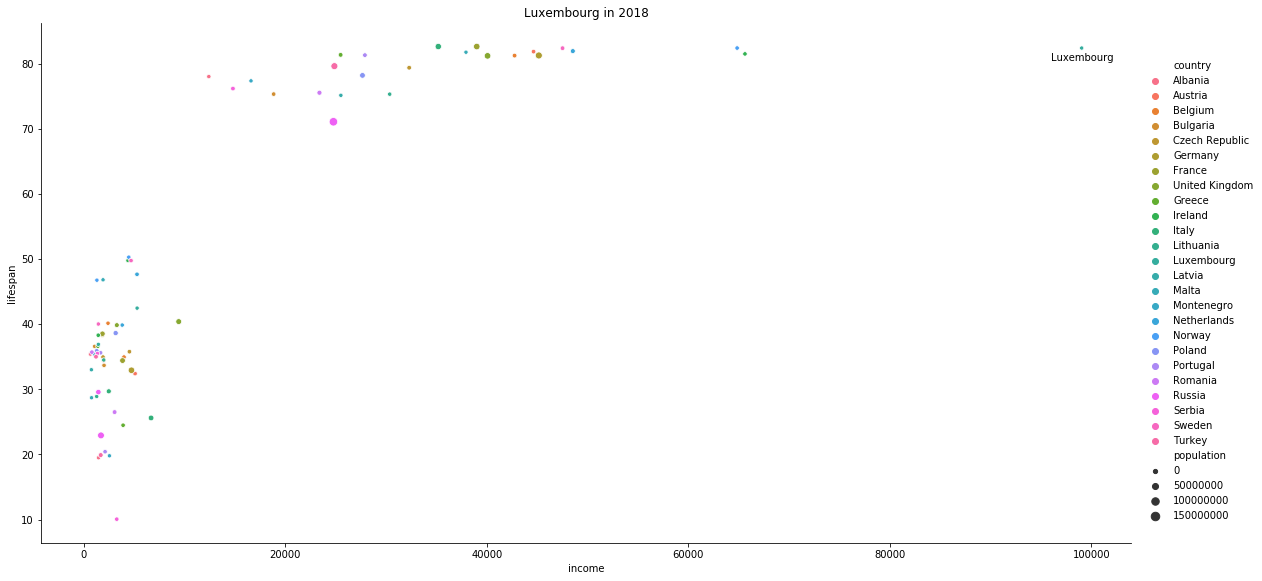

In [181]:
sns.relplot(x='income', y='lifespan', hue='country', size='population', data=world_war, height=8, aspect=2)

plt.text(x=96000, y=80.39, s='Luxembourg')

plt.title('Luxembourg in 2018');

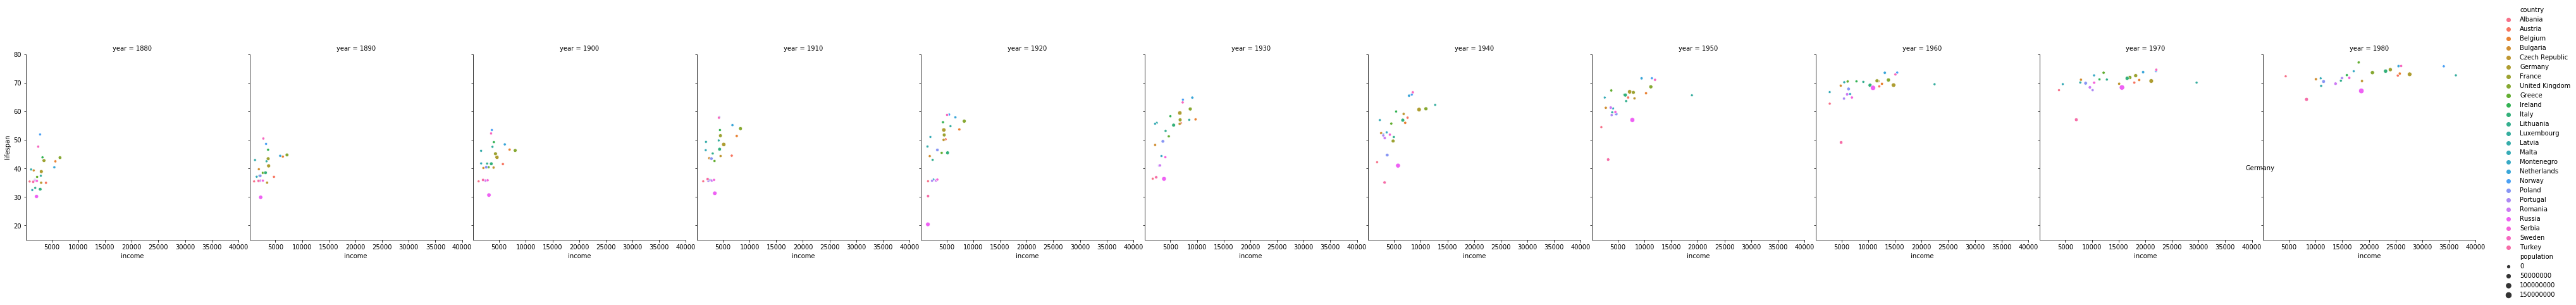

In [126]:
#hundred_years = [1880, 1900, 1920, 1940, 1960, 1980]
more_years = [1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980]

centuries = europe[europe.year.isin(more_years)]

world_war_effect = centuries[centuries.country.isin(european_war_countries)]

#print(world_war_effect.head(10))

subset = world_war_effect[world_war_effect.year.isin(more_years)]

sns.relplot(x='income', y='lifespan', hue='country', size='population', 
            col='year', data=subset)


#plt.xscale('log')
plt.xlim((150, 40000))
plt.ylim((15,80));

## Europe Population and Income over 100 years
Shows population/income growth of Europe from 1880-1980.
You can see a stunting of growth during the 1920-1940s, due to epidemic and world wars. 

##In 1880, few European countries had lifespans above 50 years

In [107]:
subset[(subset.year==1880) & (subset.lifespan >= 50)]

,year,income,lifespan,population,country,region
28075,1880,2826,51.91,1883715,Norway,europe_central_asia


## In 1980, no countries had a lifespan of under 50 years

In [108]:
subset[(subset.year==1980) & (subset.lifespan < 50)]

,year,income,lifespan,population,country,region


##In 1880, no European country's citizens had an income over 10000

In [109]:
subset[(subset.year==1880) & (subset.income >= 10000)]

,year,income,lifespan,population,country,region


##In 1980, few European country's citizens had an income under 10000

In [110]:
subset[(subset.year==1980) & (subset.income < 10000)]

,year,income,lifespan,population,country,region
837,1980,4385,72.25,2681239,Albania,europe_central_asia
38249,1980,8289,64.16,43975921,Turkey,europe_central_asia


##Interactive!

Slider allows you to see a snapshop of Europeans countries between 1880 and 1980. 

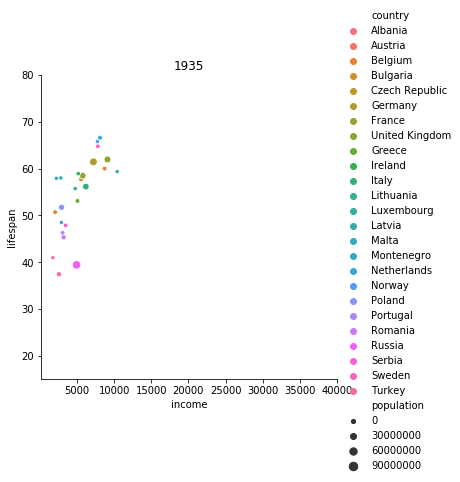

In [121]:
year = 1935 #@param {type:"slider", min:1880, max:1980, step:1}

sns.relplot(x='income', y='lifespan', hue='country', size='population', 
            data=war_countries[war_countries.year==year])

#plt.xscale('log')
plt.xlim((150, 40000))
plt.ylim((15,80))
plt.title(year);

Tabbed interface showing 10 year snapshots of population/income charts for European countries between 1880-1980

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

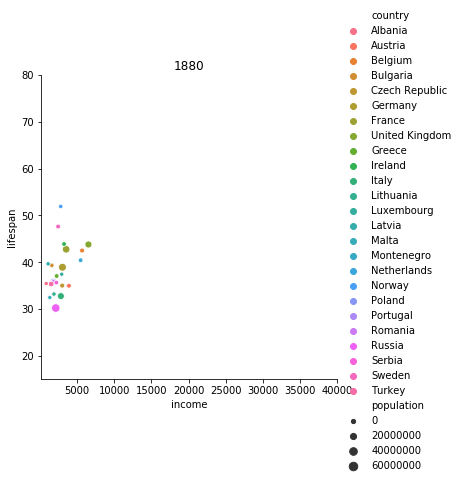

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

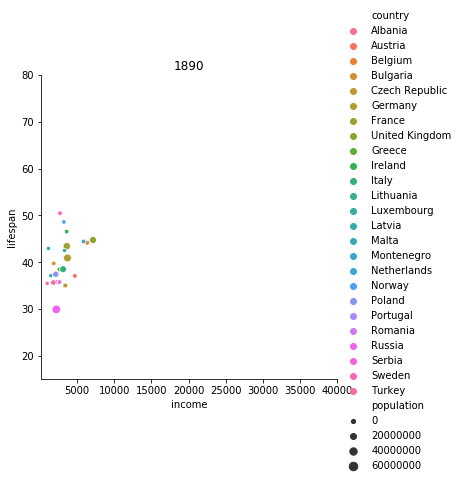

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

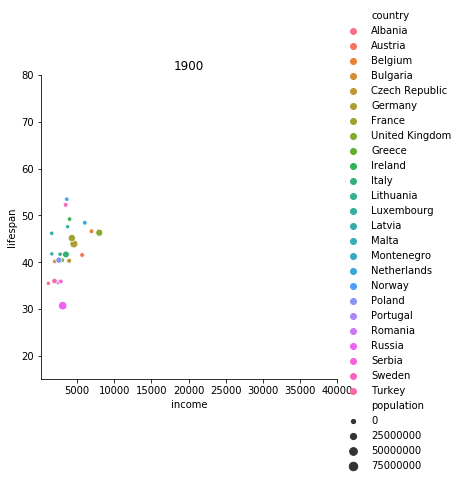

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

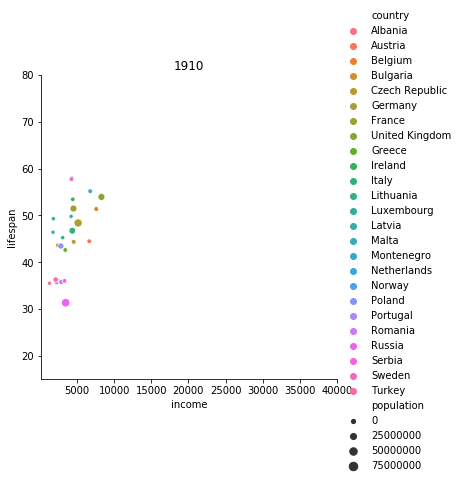

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

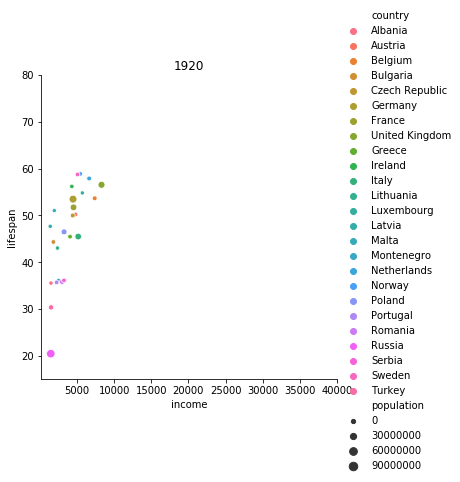

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

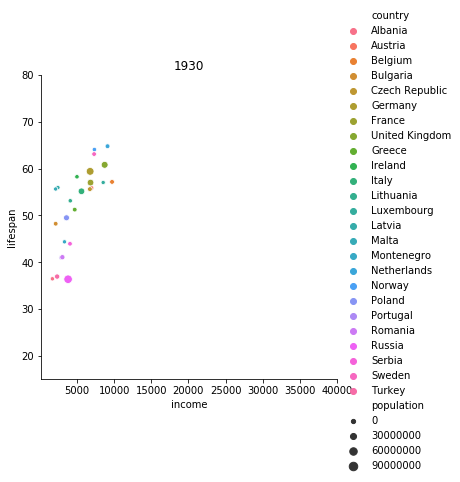

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

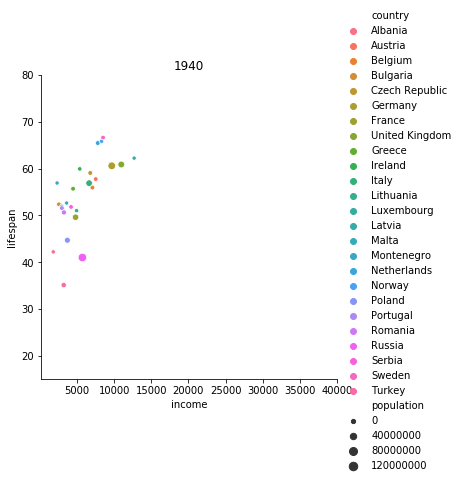

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

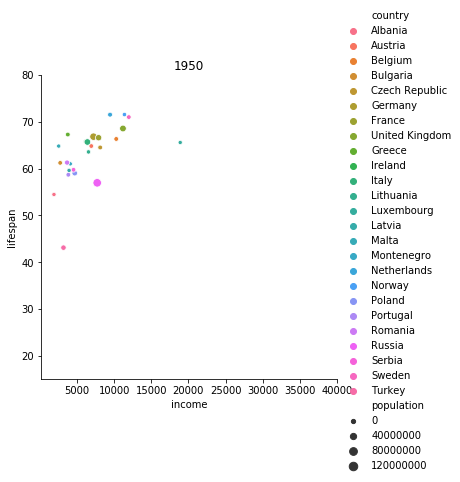

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

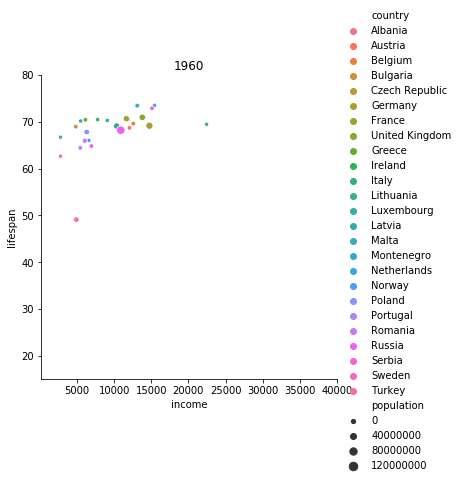

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

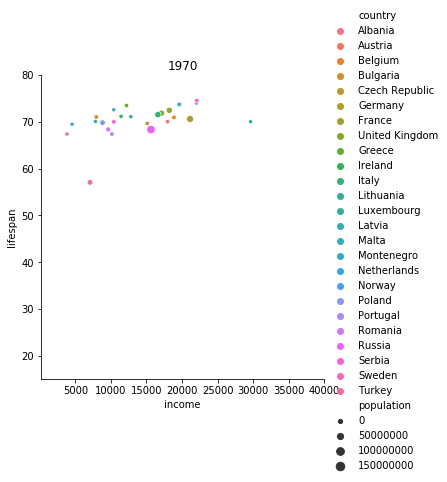

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

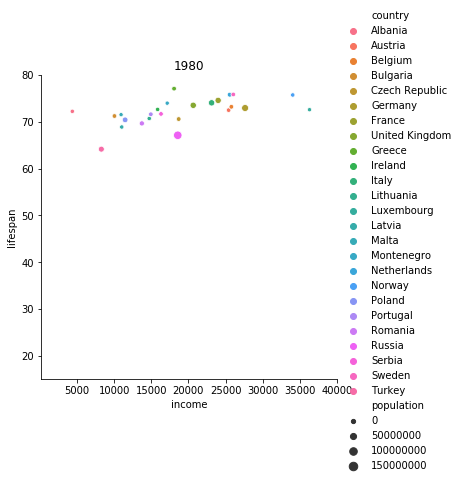

<IPython.core.display.Javascript object>

In [119]:
from google.colab import widgets
#more_years = ['1880', '1890', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980']


tb = widgets.TabBar([str(year) for year in more_years])
for tab, year in zip(tb, more_years):
    sns.relplot(x='income', y='lifespan', hue='country', size='population', 
                data=war_countries[war_countries.year==year])

#    plt.xscale('log')
    plt.xlim((150, 40000))
    plt.ylim((15,80))
    plt.title(year);